In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [10]:
data = pd.read_csv(r"C:\Users\rajen\OneDrive\Desktop\SAE\household_power_consumption.txt", sep=";", header=0, low_memory=False)
print(data.head())
print(data.columns)


         Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'S

In [11]:
print(data.columns)


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [12]:
# Convert Date + Time into single datetime
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'],
                                  format='%d/%m/%Y %H:%M:%S',
                                  errors='coerce')

# Set as index
data.set_index('Datetime', inplace=True)


In [13]:
for col in ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()


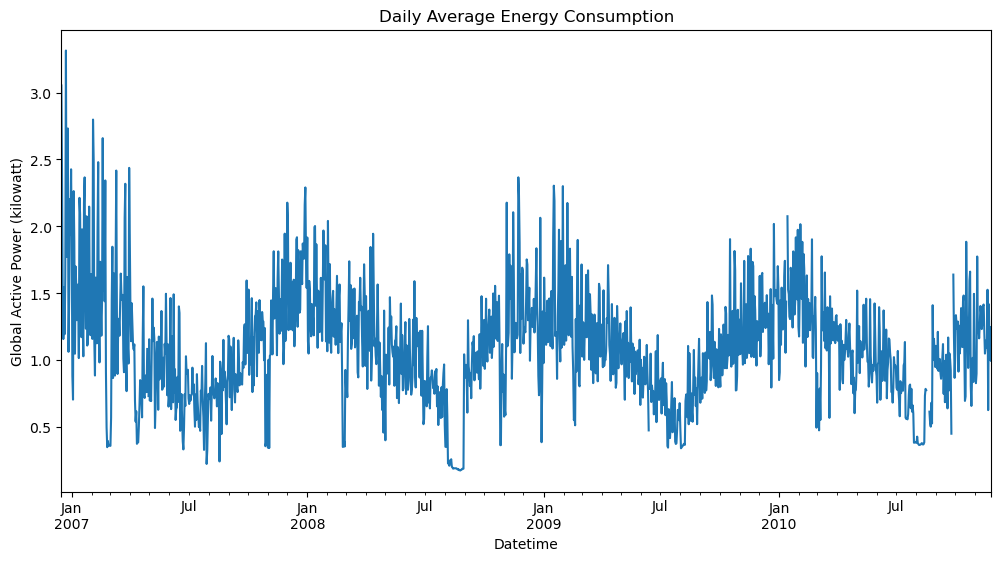

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
data['Global_active_power'].resample('D').mean().plot()
plt.title("Daily Average Energy Consumption")
plt.ylabel("Global Active Power (kilowatt)")
plt.show()


C:\Users\rajen\AppData\Local\Temp\ipykernel_12568\1951565287.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['Global_active_power'].resample('H').mean().plot()


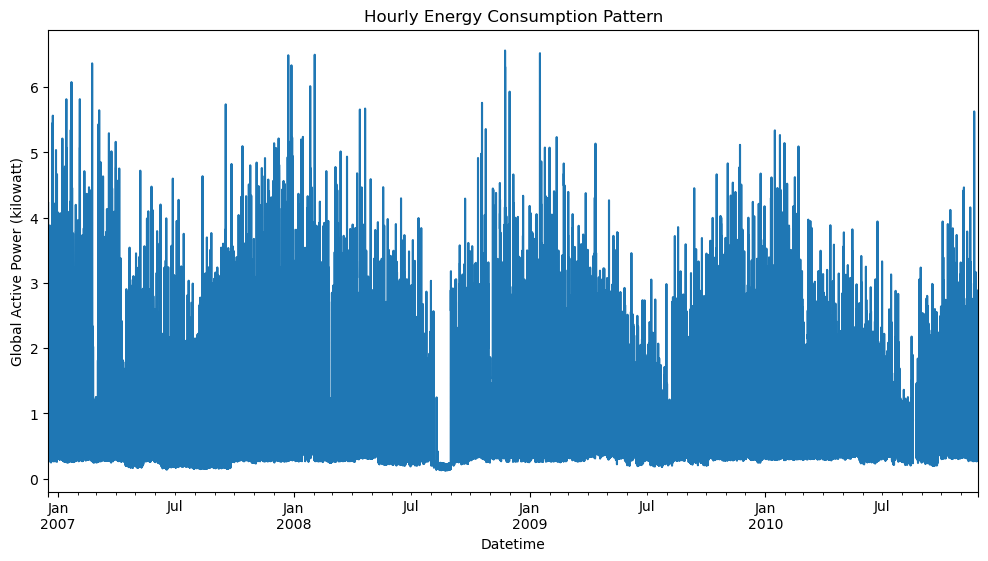

In [15]:
plt.figure(figsize=(12,6))
data['Global_active_power'].resample('H').mean().plot()
plt.title("Hourly Energy Consumption Pattern")
plt.ylabel("Global Active Power (kilowatt)")
plt.show()


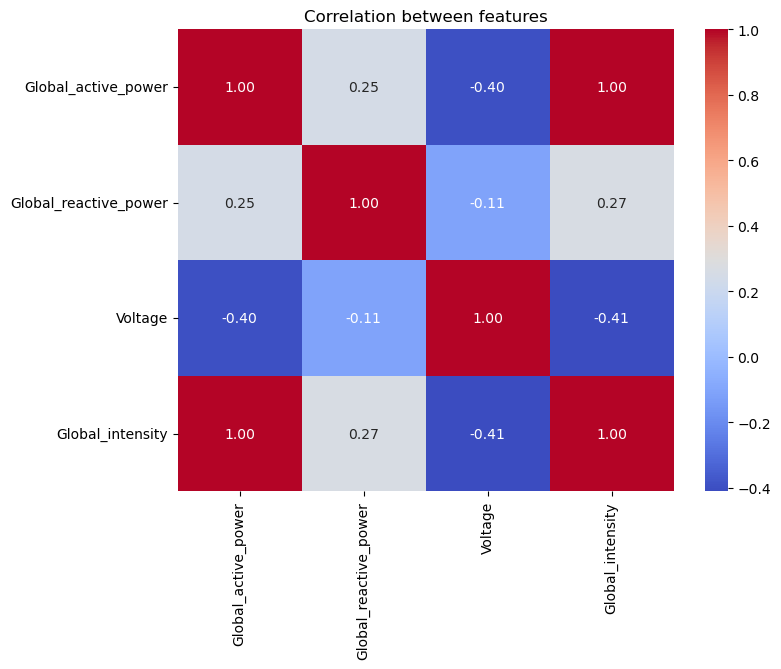

In [16]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(data[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].corr(),
            annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between features")
plt.show()


In [17]:
X = data[['Global_reactive_power', 'Voltage', 'Global_intensity']]
y = data['Global_active_power']


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


RMSE: 0.043271016944052554
R² Score: 0.9983340969207901


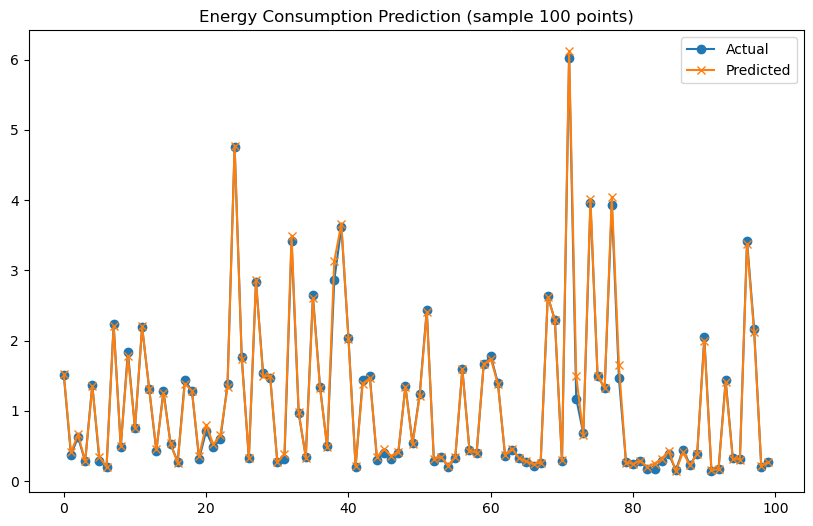

In [21]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values[:100], label="Actual", marker='o')
plt.plot(y_pred[:100], label="Predicted", marker='x')
plt.title("Energy Consumption Prediction (sample 100 points)")
plt.legend()
plt.show()
